# REPORT - Wine Quality Data Set
___

<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large186.jpg" width = "100"/>


##### Introduction:
- Those who avidly drink wine take pride in understanding the different types and aspects of it and often are quite selective on the certain types of wine they choose to drink. Because the nature of wine can change quite differently depending on its ingredients and the specific way it is brewed, the concern of grading the quality of a type of wine is very important as it ultimately determines how likely someone will consume a certain type of wine. Our project proposal is looking to be able to determine the specific category of wine quality for red wine samples and more specifically, if we are able to accurately grade the wine quality of different samples of red wine based off of their four most relevant ingredients. The parameters we will be using to determine the classification of “wine quality” as defined by Cortez et al. is a continuous integer-based scale with 0 being very bad quality and 10 being excellent quality of wine. To carry out this procedure we decided to use the “Wine Quality Data Set” which shows numerous observations of red wine with 11 columns attached with a final column being used to show the wine quality score given.

##### Methods:
- This is a classification process because we are predicting categorical values. Firstly, we will split our dataset into a training and testing set. The variables we will use as predictors will be sulphates, pH, total sulfur dioxide and alcohol. The reason we will be looking at these columns as predictors is accord to their study (Cortez et al), those are the four most relevant factors in determining the quality for red wine. We will be grading the success of our classifier based off its accuracy to correctly predict which category of wine quality each observation of red wine belongs to from our testing set. We’ll use cross validation to get the best estimate of accuracy for our classifier so we can know which parameters work the best. We’ll show a visual representation of this in the form of a line graph, highlighting the different estimate accuracies in relation to the amount of neighbors we use. Finally we’ll use the best parameter to see if our classifier can accurately predict the wine quality based on these 4 predictors.

##### Expected outcomes and significance:
- We are expecting that that there will be a good chance our classifier isn’t very accurate and this is due to the fact that although the 4 predictors chosen are the 4 most relevant, the remaining variables are still collectively important to effectively predict the quality of red wine. The findings we have will be impactful as it will give consumers and your average wine connoisseurs a better understanding of what to place higher emphasis on when grading wine quality and ultimately looking for which wine to buy. These findings could potentially lead to questions such as “Is it valid to use objective quantitative data as a means of determining an ultimately subjective classification?”

Study the dataset comes from - Modeling wine preferences by data mining from physicochemical properties - Paulo Cortez, António Cerdeir, Fernando Almeida, Telmo Matos, José Reis https://www.sciencedirect.com/science/article/pii/S0167923609001377?via%3Dihub

#### Preliminary exploratory data analysis:
___

In [1]:
# load the libraries
library(repr)
library(tidyverse)
library(tidymodels)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

**Read the dataset from the web**,
<br> randomly select 10 rows to observe the dataframe.

In [2]:
wine_data <- read_csv2("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv") 
slice_sample(wine_data, n = 10)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (5): volatile acidity, citric acid, chlorides, density, sulphates
dbl (2): total sulfur dioxide, quality

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
63,0.36,0.19,32,0.075,15,39,0.9956,356,0.52,127,6
117,0.45,0.63,22,0.073,7,23,0.99974,321,0.69,109,6
75,0.61,0.2,17,0.076,36,60,0.99494,31,0.4,93,5
75,0.58,0.03,41,0.08,27,46,0.99592,302,0.47,92,5
10,0.56,0.24,22,0.079,19,58,0.9991,318,0.56,101,6
102,0.24,0.49,24,0.075,10,28,0.9978,314,0.61,104,5
115,0.42,0.48,26,0.077,8,20,0.99852,309,0.53,11,5
79,0.34,0.36,19,0.065,5,10,0.99419,327,0.54,112,7
68,0.67,0.15,18,0.118,13,20,0.9954,342,0.67,113,6


**In our dataset, we can see there are only 2 rows that have missing data. We choose to remove these incomplete cases from the dataframe using `na.omit`.**

In [3]:
wine_data[!complete.cases(wine_data),]
wine_data <- na.omit(wine_data)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
66,0.63,0,43,0.093,51,NA,0.99558,32,0.45,95,5
66,0.63,0,43,0.093,51,NA,0.99558,32,0.45,95,5


**In addition, we use `make.names` to replace column names that contain empty spaces with a `.`. This will allow us use our tidyverse functions more conveniently.**

In [4]:
colnames(wine_data) <- make.names(colnames(wine_data))
slice(wine_data, 1)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5


**Based on our introduction, we will select the column of which are the four most relevant factors in determining the quality for red wine.**

In [5]:
wine_data <- select(wine_data, sulphates, pH, total.sulfur.dioxide, alcohol, quality)
slice_sample(wine_data, n = 5)

sulphates,pH,total.sulfur.dioxide,alcohol,quality
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0.53,315,38,98,5
0.67,336,61,107,6
0.73,323,28,113,7
0.54,333,58,98,5
0.5,321,61,95,5


**We then used `mutate` to convert all predictors into numeric data; convert target variable to factors using `as_factor`.**

In [6]:
wine_data <- wine_data |> 
  mutate(across(sulphates:alcohol, as.numeric)) |>
  mutate(quality = as_factor(quality))
slice(wine_data, 1)

sulphates,pH,total.sulfur.dioxide,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.56,351,34,94,5


**After tidying our data to a format that is suitable for analysis, we continue to next step by 
focusing specifically on the training data.**
<br> We choose to split 75% of our original data set into the training set.

In [7]:
set.seed(1)

wine_split <- initial_split(wine_data, prop = 0.75, strata = quality)  
wine_train <- training(wine_split)   
wine_test <- testing(wine_split)

**Since all of the predictor variables contains quantitaive data, we used `group_by` to separate each class label, and found the mean of each predictor variable under each class label using `summarize` + `across`.**

In [8]:
wine_train_avg <- wine_train |> 
  group_by(quality) |>
  summarize(across(sulphates:alcohol, mean))

wine_train_avg

quality,sulphates,pH,total.sulfur.dioxide,alcohol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
3,0.5633333,238.8333,27.16667,1.020000e+02
4,0.6040476,271.3810,36.83333,1.045476e+02
5,0.6189980,301.1179,56.48919,9.110413e+01
6,0.6748626,298.5476,41.58562,4.398872e+12
7,0.7351678,301.1611,35.87248,1.063221e+02
8,0.7647059,293.5294,33.70588,9.052941e+01


**We can also find the mean of all predictor variables.**

In [9]:
wine_train_avg2 <- wine_train |> 
summarize(across(sulphates:alcohol, mean))

wine_train_avg2

sulphates,pH,total.sulfur.dioxide,alcohol
<dbl>,<dbl>,<dbl>,<dbl>
0.6568311,298.6421,46.86538,1.739688e+12


**Next, we use `group_by` + `summarize` to find out the distribution of each of our target variable (quality).**

In [10]:
target <- wine_train |>
    group_by(quality) |>
    summarize(n = n())
target

quality,n
<fct>,<int>
3,6
4,42
5,509
6,473
7,149
8,17


**We can also use a bar graph to plot the distribution:**

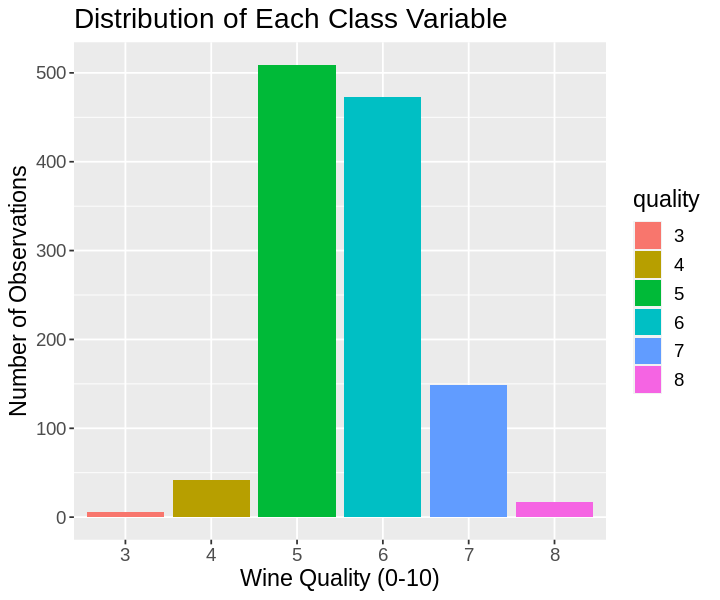

In [11]:
options(repr.plot.width = 6, repr.plot.height = 5)

plot <- ggplot(target, aes(x = quality, y = n, fill = quality)) +
  geom_bar(stat = "identity") +
  labs(x = "Wine Quality (0-10)", y = "Number of Observations") +
  ggtitle("Distribution of Each Class Variable") +
  theme(text = element_text(size = 14))
plot


A potential issue in our data set for a classifier is class imbalance, since the label 5 and 6 are much more common than other classes. Thus, we will add an oversampling step to the recipe with the `step_upsample` function from the `themis` R package. By oversampling the rare classes, we can give them more voting power to in the K-nearest neighbor algorithm.

In [12]:
install.packages("themis") #install and load package
library(themis)

wine_recipe <- recipe(quality ~ ., wine_train) |>
  step_upsample(quality, over_ratio = 1, skip = FALSE) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) |>
  prep()
wine_recipe

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Training data contained 1196 data points and no missing data.

Operations:

Up-sampling based on quality [trained]
Scaling for sulphates, pH, total.sulfur.dioxide, alcohol [trained]
Centering for sulphates, pH, total.sulfur.dioxide, alcohol [trained]

**Now each class shares equal distribution in the overall dataset with 509 observations each.**

In [13]:
upsampled_wine <- bake(wine_recipe, wine_train)

upsampled_wine |>
  group_by(quality) |>
  summarize(n = n())

quality,n
<fct>,<int>
3,509
4,509
5,509
6,509
7,509
8,509


**To visualize graphically:**

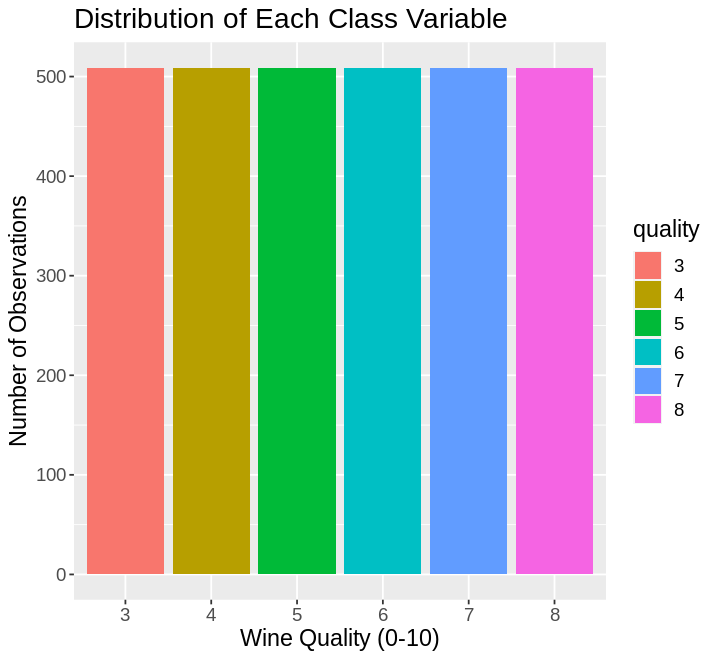

In [14]:
options(repr.plot.width = 6, repr.plot.height = 5.5)

upsampled_wine  |>
  ggplot(aes(quality, fill = quality)) +
  geom_bar() +
  labs(x = "Wine Quality (0-10)", y = "Number of Observations") +
  ggtitle("Distribution of Each Class Variable") +
  theme(text = element_text(size = 14))

### VISUALIZATION
___

**First we use `boxplot` to identify any outliers in our data.**
<br> We observed that alcohol column contains a few unrealistic high values that are unsuitable for data analysis.

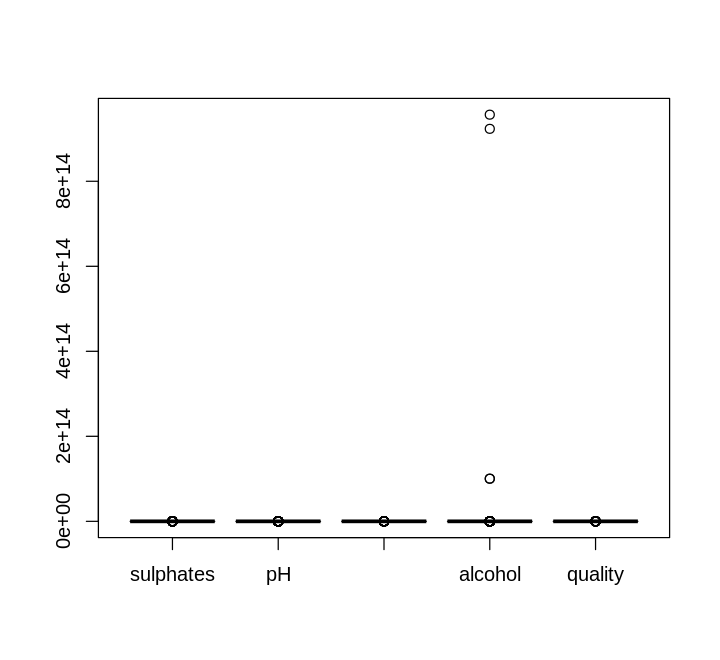

In [15]:
boxplot(wine_train)

**Therefore, we removed the outliers based on the percentiles, where 9 observations are excluded from our training set.**

In [16]:
print("Before:")
dim(wine_train)

# We considered outliers as observations that lie outside the interval formed by the 1 and 99 percentiles
quartiles <- quantile(wine_train$alcohol, probs=c(.01, .99), na.rm = FALSE)
IQR <- IQR(wine_train$alcohol)
 
Lower <- quartiles[1] - 1.5*IQR
Upper <- quartiles[2] + 1.5*IQR 
 
wine_train <- subset(wine_train, wine_train$alcohol > Lower & wine_train$alcohol < Upper)
print("After:")
dim(wine_train)

[1] "Before:"


[1] 1196    5

[1] "After:"


[1] 1187    5

**Now we can compare the distributions of each of the `predictor variables vs. quality` by graphing jitterplots.**

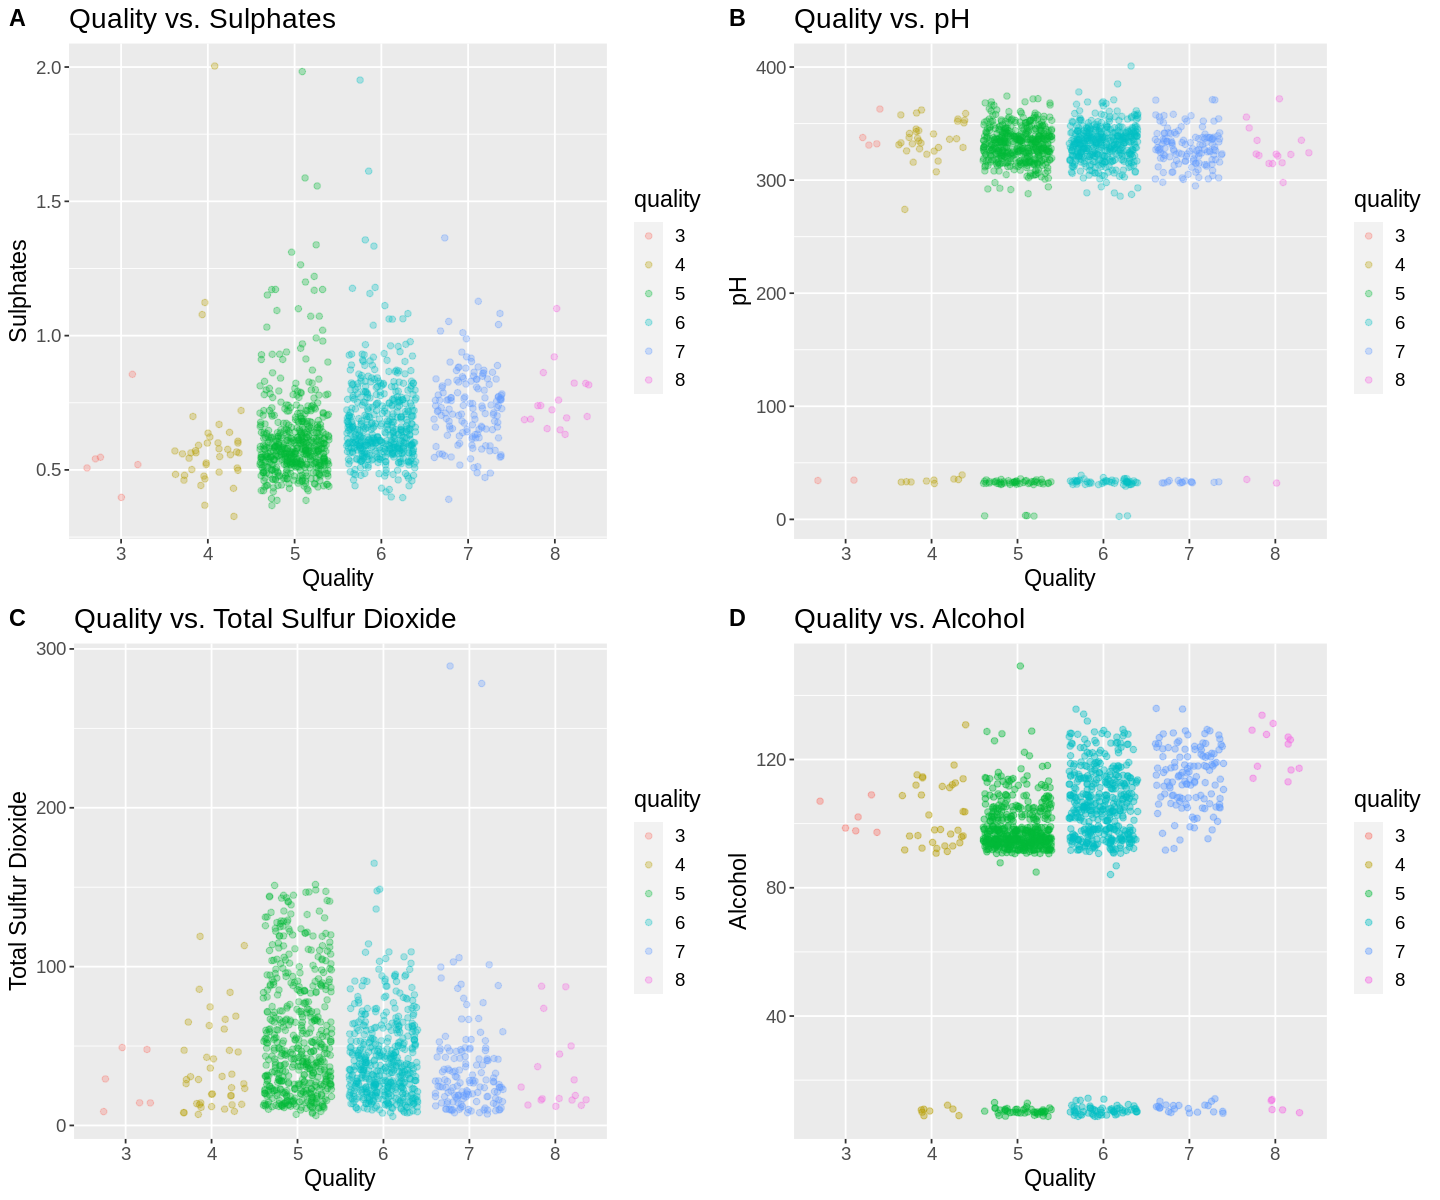

In [17]:
# quality vs. sulphates
graph <- ggplot(wine_train, aes(x = quality, y = sulphates, color = quality)) +
geom_jitter(alpha = 0.3) +
xlab("Quality") +
ylab("Sulphates") +
ggtitle("Quality vs. Sulphates") +
theme(text = element_text(size = 14))

# quality vs. pH
graph1 <- ggplot(wine_train, aes(x = quality, y = pH, color = quality)) +
geom_jitter(alpha = 0.3) +
xlab("Quality") +
ylab("pH") +
ggtitle("Quality vs. pH") +
theme(text = element_text(size = 14))

# quality vs. total sulfur dioxide
graph2 <- ggplot(wine_train, aes(x = quality, y = total.sulfur.dioxide, color = quality)) +
geom_jitter(alpha = 0.3) +
xlab("Quality") +
ylab("Total Sulfur Dioxide")+
ggtitle("Quality vs. Total Sulfur Dioxide") +
theme(text = element_text(size = 14))

# quality vs. alcohol
graph3 <- ggplot(wine_train, aes(x = quality, y = alcohol, color = quality)) +
geom_jitter(alpha = 0.4) +
xlab("Quality") +
ylab("Alcohol") +
ggtitle("Quality vs. Alcohol") +
theme(text = element_text(size = 14))

# COMBINED 
options(repr.plot.width = 12, repr.plot.height = 10)
plot_grid(graph, graph1, graph2, graph3, 
          labels = c("A", "B", "C", "D"), 
          ncol = 2, nrow = 2)

From the scatterplots above, we can observe the distribution of each predictor variables that falls in each class, as well as a general relationship between of predictors and the level of wine quality. For example, predictors such as sulphates and total sulphur dioxide have less varied data and clustered data points, while the pH and Alcohol level in red wine can be separated as two different groups, with one group outnumbering the other. However, both groups contains data in different wine qualities. Additionally, we observed from the first graph that wines with higher sulphates are favored and have generally higher quality level.

### DATA ANALYSIS
___

Now our data is clean and ready to perform classification based on our previously splitted training and testing datasets.

In [22]:
set.seed(1)

## Prepare the recipe using upsampled training data and preprocess all variables ##
upsampled_wine_recipe <- recipe(quality ~ ., data = upsampled_wine) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

## Create nearest_neighbor model specification with neighbors undetermined ##
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

## 5 validation sets splitted from training data ##
wine_vfold <- vfold_cv(wine_train, v = 5, strata = quality)

## 25 neighbors (K) ##
gridvals <- tibble(neighbors = seq(1, 20))

## Perform 5-fold cross-validation to estimate the classifier accuracy for different K values ##
wine_results <- workflow() |>
  add_recipe(upsampled_wine_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = wine_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")
wine_results    

! Fold2: internal:
  No observations were detected in `truth` for level(s): '3'
  Computation will proceed by ignoring those levels.



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5779243,5,0.006047139,Preprocessor1_Model01
2,accuracy,multiclass,0.5779243,5,0.006047139,Preprocessor1_Model02
3,accuracy,multiclass,0.5585328,5,0.007702308,Preprocessor1_Model03
4,accuracy,multiclass,0.5543276,5,0.009463428,Preprocessor1_Model04
5,accuracy,multiclass,0.5644293,5,0.011571367,Preprocessor1_Model05
6,accuracy,multiclass,0.5703223,5,0.009664699,Preprocessor1_Model06
7,accuracy,multiclass,0.5753679,5,0.014109228,Preprocessor1_Model07
8,accuracy,multiclass,0.5770592,5,0.016459440,Preprocessor1_Model08
9,accuracy,multiclass,0.5812750,5,0.018365071,Preprocessor1_Model09


[1] 0.581275

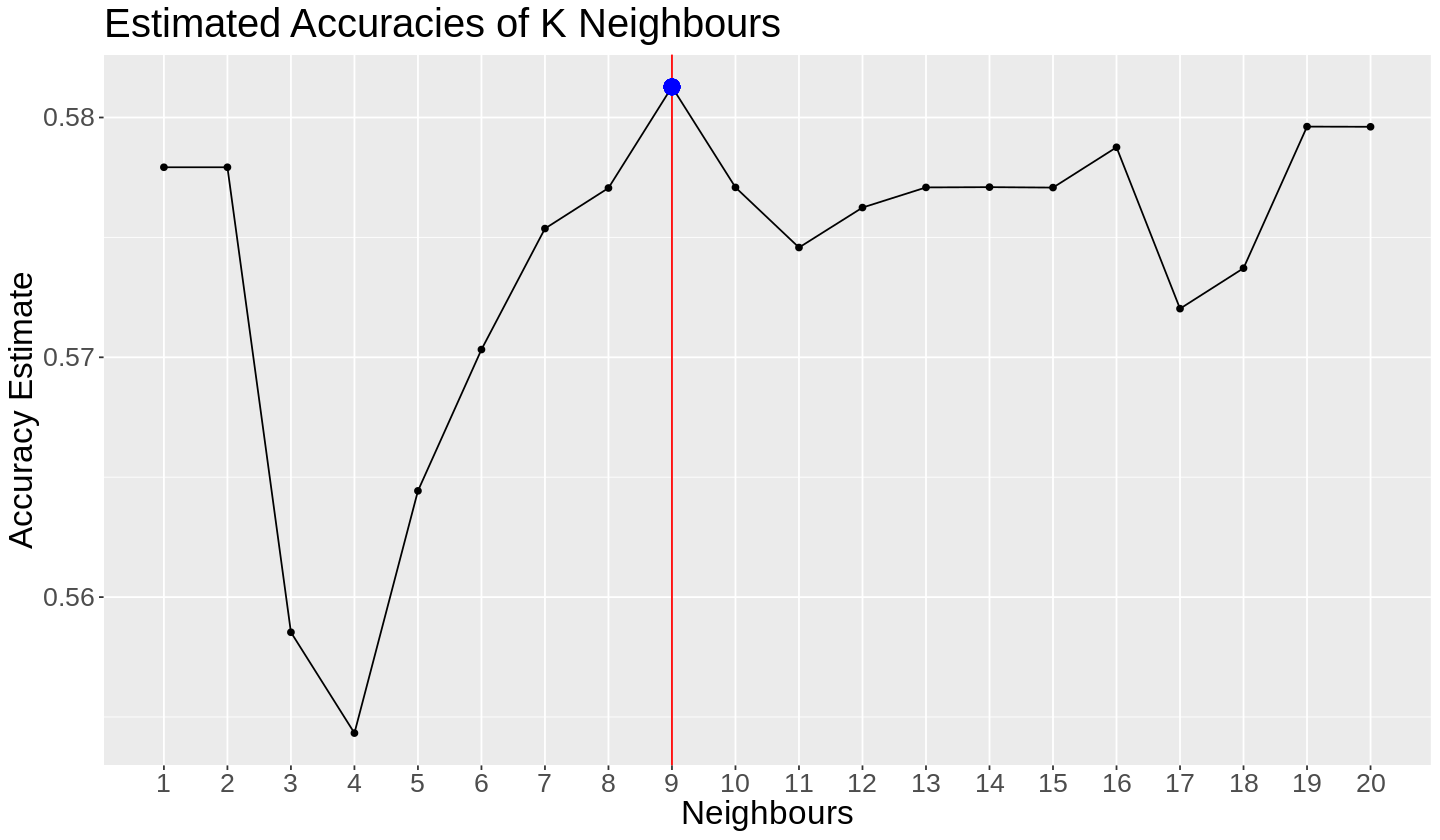

In [23]:
options(repr.plot.width = 12, repr.plot.height = 7)

## Get the best mean value from K = 9 ##
best_mean <- wine_results |>
    filter(neighbors == 9) |>
    select(mean) |>
    pull()
best_mean

## Generate line plot to better visualize the highest accuracy for each neighbors ##
cross_val_plot <- wine_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    geom_vline(xintercept = 9, colour = "red") +
    geom_point(aes(x = 9, y = best_mean), size = 4, colour = "blue") +
    labs(x = "Neighbours",
         y = "Accuracy Estimate",
         title = "Estimated Accuracies of K Neighbours") +
    scale_x_continuous(limits = c(1, 20),
                       breaks = seq(1, 20),
                       minor_breaks = seq(1, 20, 1)) +
    theme(text = element_text(size = 20),
          plot.caption = element_text(size = 20, hjust = 0))

cross_val_plot

In [29]:
## Build the classifier again with the best K observed on graph ##
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
  set_engine("kknn") |>
  set_mode("classification")

## Add the recipe and new model specification to re-train the classifier ##
wine_fit <- workflow() |>
  add_recipe(upsampled_wine_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = wine_train)

## Predict the test set ##
set.seed(1)
wine_predictions <- predict(wine_fit, wine_test) |> 
    bind_cols(wine_test)

**I. Compare the accuracy of predictions to the true values in the test set:**

In [31]:
wine_acc <- wine_predictions |> 
    metrics(truth = quality, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)
wine_acc

.metric,.estimate
<chr>,<dbl>
accuracy,0.6209476


**II. Compare the predictions to the true values in a confusion matrix:**

In [32]:
wine_cm <- wine_predictions |> 
    conf_mat(truth = quality, estimate = .pred_class)
wine_cm

          Truth
Prediction   3   4   5   6   7   8
         3   0   0   0   0   0   0
         4   0   0   0   0   0   0
         5   3   8 125  53   4   0
         6   1   3  44 100  22   1
         7   0   0   1  12  24   0
         8   0   0   0   0   0   0